In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mdp import FrozenLakeEnv
from mdp import has_graphviz
%matplotlib inline

In [2]:
def get_action_value(mdp, state_values, state, action, gamma):
    """ Computes Q(s,a) """
    q = 0
    for s, prob_s in mdp.get_next_states(state,action).items():
        q += prob_s * (mdp.get_reward(state, action, s) + gamma * state_values[s])
    return q

In [3]:
def get_new_state_value(mdp, state_values, state, gamma):
    """ Computes next V(s) .Please do not change state_values in process. """
    if mdp.is_terminal(state):
        return 0
    q = [get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)]
    return max(q)

In [4]:
def get_optimal_action(mdp, state_values, state, gamma=0.9):
    """ Finds optimal action. """
    if mdp.is_terminal(state):
        return None
    q = {a: get_action_value(mdp,state_values,state,a,gamma)
        for a in mdp.get_possible_actions(state)}
    return max(q, key=q.get)

In [5]:
def rl_value_iteration(mdp, gamma, num_iter, min_difference, init_state_values):
    # Initialize V(s)
    state_values = init_state_values

    for i in range(num_iter):
        # Compute new state values using the functions you defined above.
        # It must be a dict {state : float V_new(state)}
        new_state_values = {s : get_new_state_value(mdp,state_values,s,gamma) for s in mdp.get_all_states()}

        assert isinstance(new_state_values, dict)

        # Compute difference
        diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())
        if not visualize:
            print('Iteration = %4i | Difference = %.3f |   ' % (i, diff), end='')
            print('   '.join('V(%s) = %.3f' % (s, v) for s, v in state_values.items()), end='\n')

        # Updating state_values
        state_values = new_state_values

        if diff < min_difference:
            print('Done!')
            return state_values, True

    return state_values, False

In [6]:
def draw_policy(mdp, state_values, fig=None):
    h, w = mdp.desc.shape
    states = sorted(mdp.get_all_states())
    V = np.array([state_values[s] for s in states])
    Pi = {s: get_optimal_action(mdp, state_values, s, gamma) for s in states}
    plt.imshow(V.reshape(w, h), cmap='gray', interpolation='none', clim=(0, 1))
    ax = plt.gca()
    ax.set_xticks(np.arange(h)-.5)
    ax.set_yticks(np.arange(w)-.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    Y, X = np.mgrid[0:4, 0:4]
    a2uv = {'left': (-1, 0), 'down': (0, -1), 'right': (1,0), 'up': (-1, 0)}
    for y in range(h):
        for x in range(w):
            plt.text(x, y, str(mdp.desc[y,x].item()),
                     color='g', size=12,  verticalalignment='center',
                     horizontalalignment='center', fontweight='bold')
            a = Pi[y, x]
            if a is None:
                continue
            u, v = a2uv[a]
            plt.arrow(x, y,u*.3, -v*.3, color='m', head_width=0.1, head_length=0.1)
    plt.grid(color='b', lw=2, ls='-')
    plt.draw()
    plt.pause(2)
    if fig is not None:
        plt.cla()

In [7]:
def visualize_step_by_step(mdp, gamma, max_iter_number, min_difference):
    fig = plt.figure(figsize=(5, 5))
    state_values = {state: 0 for state in mdp.get_all_states()}
    for i in range(max_iter_number):
        new_state_values, done = rl_value_iteration(mdp, gamma, 1, min_difference, state_values)
        if done:
            break
        draw_policy(mdp, new_state_values, fig)
        state_values = new_state_values

In [8]:
def mass_gaming(mdp, gamma, num_iter, games_number, steps_number):
    state_values = {state: 0 for state in mdp.get_all_states()}
    state_values, _ = rl_value_iteration(mdp, gamma, num_iter, min_difference, state_values)

    total_rewards = []
    for game_i in range(games_number):
        s = mdp.reset()
        rewards = []
        for t in range(steps_number):
            s, r, done, _ = mdp.step(get_optimal_action(mdp, state_values, s, gamma))
            rewards.append(r)
            if done:
                break
        total_rewards.append(np.sum(rewards))
    print('Average reward: ', np.mean(total_rewards))
    if mdp.slip_chance == 0:
        assert (1.0 <= np.mean(total_rewards) <= 1.0)
    else:
        assert (0.8 <= np.mean(total_rewards) <= 0.95)
    print('Well done!')

In [22]:
visualize = True
mdp = FrozenLakeEnv(map_name='8x8', slip_chance=0.1)
mdp.render()

*FFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG



In [23]:
gamma = 0.9
num_iter = 100
min_difference = 1e-5

# Play in Frozen Lake Env
state_values = {s : 0 for s in mdp.get_all_states()}  # Initialize state_values

# Run value iteration algo!
state_values, _ = rl_value_iteration(mdp, gamma, num_iter, min_difference, state_values)

# See how our agent performs - e.g. render what is going on when agent choose `optimal` value
s = mdp.reset()
mdp.render()
rewards = []  # Save all rewards to see mean reward.

for t in range(num_iter):
    s, r, done, _ = mdp.step(get_optimal_action(mdp, state_values, s, gamma))
    rewards.append(r)
    if done: break
print('Average reward: ', np.mean(rewards))

Done!
*FFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

Average reward:  0.05263157894736842


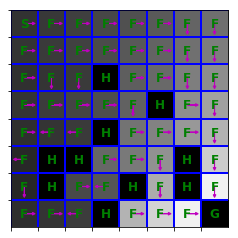

In [14]:
if visualize:
    draw_policy(mdp, state_values)

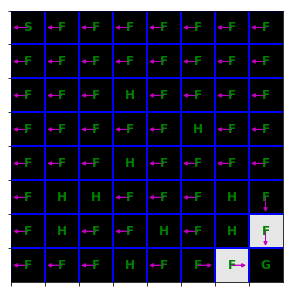

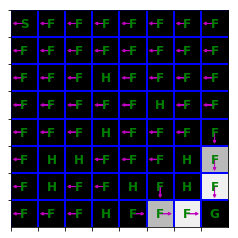

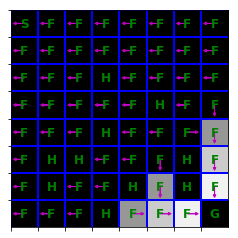

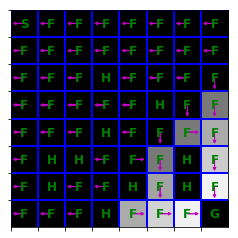

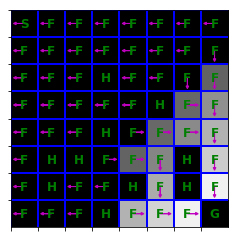

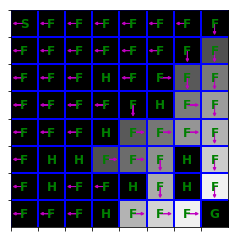

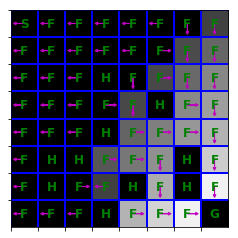

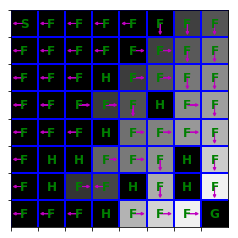

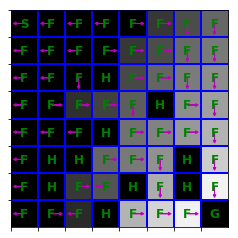

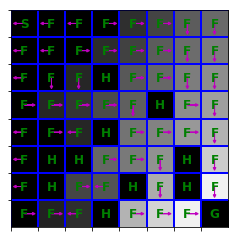

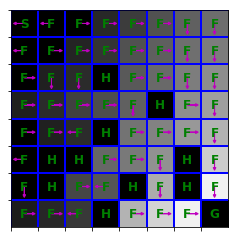

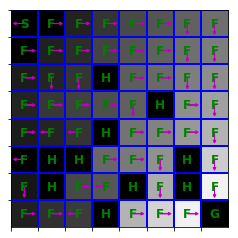

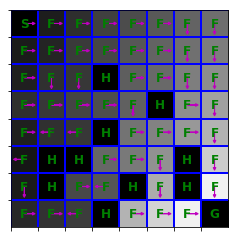

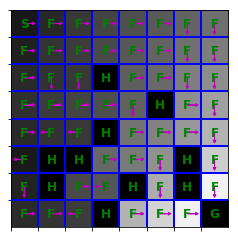

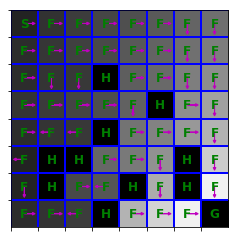

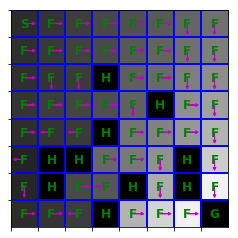

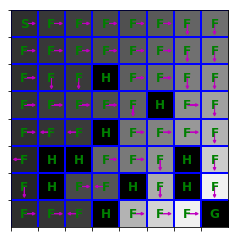

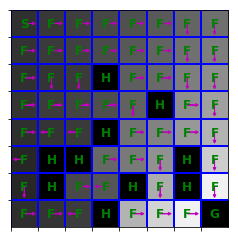

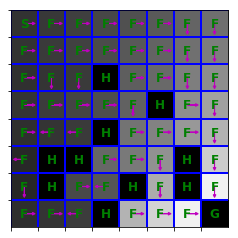

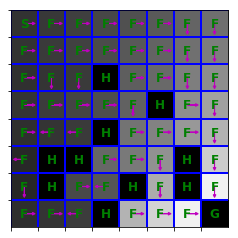

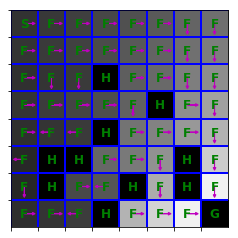

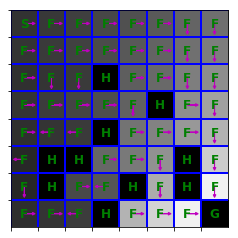

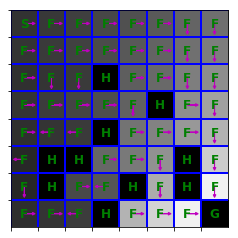

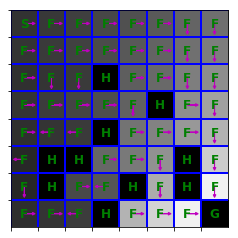

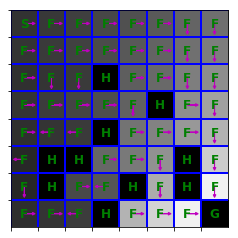

Done!


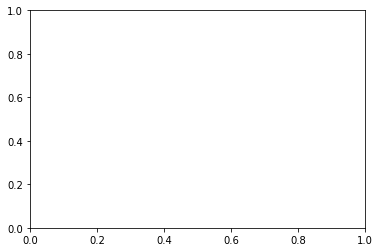

In [15]:
# Let's see how it is improving in time.
visualize_step_by_step(mdp, gamma, num_iter, min_difference)

In [16]:
# Express test!
visualize=False
mass_gaming(mdp, gamma, num_iter, 1000, 100)

Iteration =    0 | Difference = 0.900 |   V((0, 0)) = 0.000   V((0, 1)) = 0.000   V((0, 2)) = 0.000   V((0, 3)) = 0.000   V((0, 4)) = 0.000   V((0, 5)) = 0.000   V((0, 6)) = 0.000   V((0, 7)) = 0.000   V((1, 0)) = 0.000   V((1, 1)) = 0.000   V((1, 2)) = 0.000   V((1, 3)) = 0.000   V((1, 4)) = 0.000   V((1, 5)) = 0.000   V((1, 6)) = 0.000   V((1, 7)) = 0.000   V((2, 0)) = 0.000   V((2, 1)) = 0.000   V((2, 2)) = 0.000   V((2, 3)) = 0.000   V((2, 4)) = 0.000   V((2, 5)) = 0.000   V((2, 6)) = 0.000   V((2, 7)) = 0.000   V((3, 0)) = 0.000   V((3, 1)) = 0.000   V((3, 2)) = 0.000   V((3, 3)) = 0.000   V((3, 4)) = 0.000   V((3, 5)) = 0.000   V((3, 6)) = 0.000   V((3, 7)) = 0.000   V((4, 0)) = 0.000   V((4, 1)) = 0.000   V((4, 2)) = 0.000   V((4, 3)) = 0.000   V((4, 4)) = 0.000   V((4, 5)) = 0.000   V((4, 6)) = 0.000   V((4, 7)) = 0.000   V((5, 0)) = 0.000   V((5, 1)) = 0.000   V((5, 2)) = 0.000   V((5, 3)) = 0.000   V((5, 4)) = 0.000   V((5, 5)) = 0.000   V((5, 6)) = 0.000   V((5, 7)) = 0.000 

Average reward:  0.864
Well done!
